In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

Hint:
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['species']].values
# Standardizing the features
standardizedData = StandardScaler().fit_transform(x)

# PCA Projection to 3D
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(standardizedData)

# to get how much variance was retained
print(pca.explained_variance_ratio_.sum())

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf

0.9948212908928451


,principal component 1,principal component 2,principal component 3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


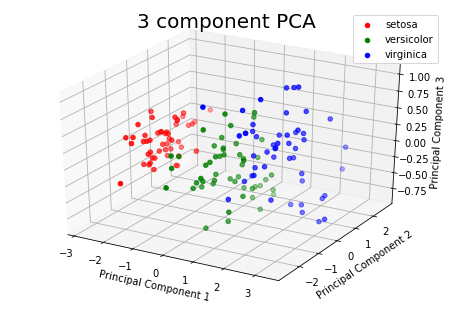

In [5]:
fig = plt.figure() 
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_zlabel('Principal Component 3', fontsize = 10)
ax.set_title('3 component PCA', fontsize = 20)
species = np.array(df['species'].unique())
colors = ['r', 'g', 'b']
for specie, color in zip(species,colors):
    indicesToKeep = finalDf['species'] == specie
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color)
    ax.scatter3D
ax.legend(species)
ax.grid()